In [1]:
import matplotlib.pyplot as plt
import numpy as np
from calculateKGV import GVCalculator

In [2]:
n = 64
n_layers = 256
x = np.array([[1]])

gvc = GVCalculator(n_layers, n, 2, 1, 1, 1, 0, lambda x: x)

$G^{(\ell)} = 1$

$v^{(\ell)} = v_{(\ell)} = 2(\ell-1)/n$

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

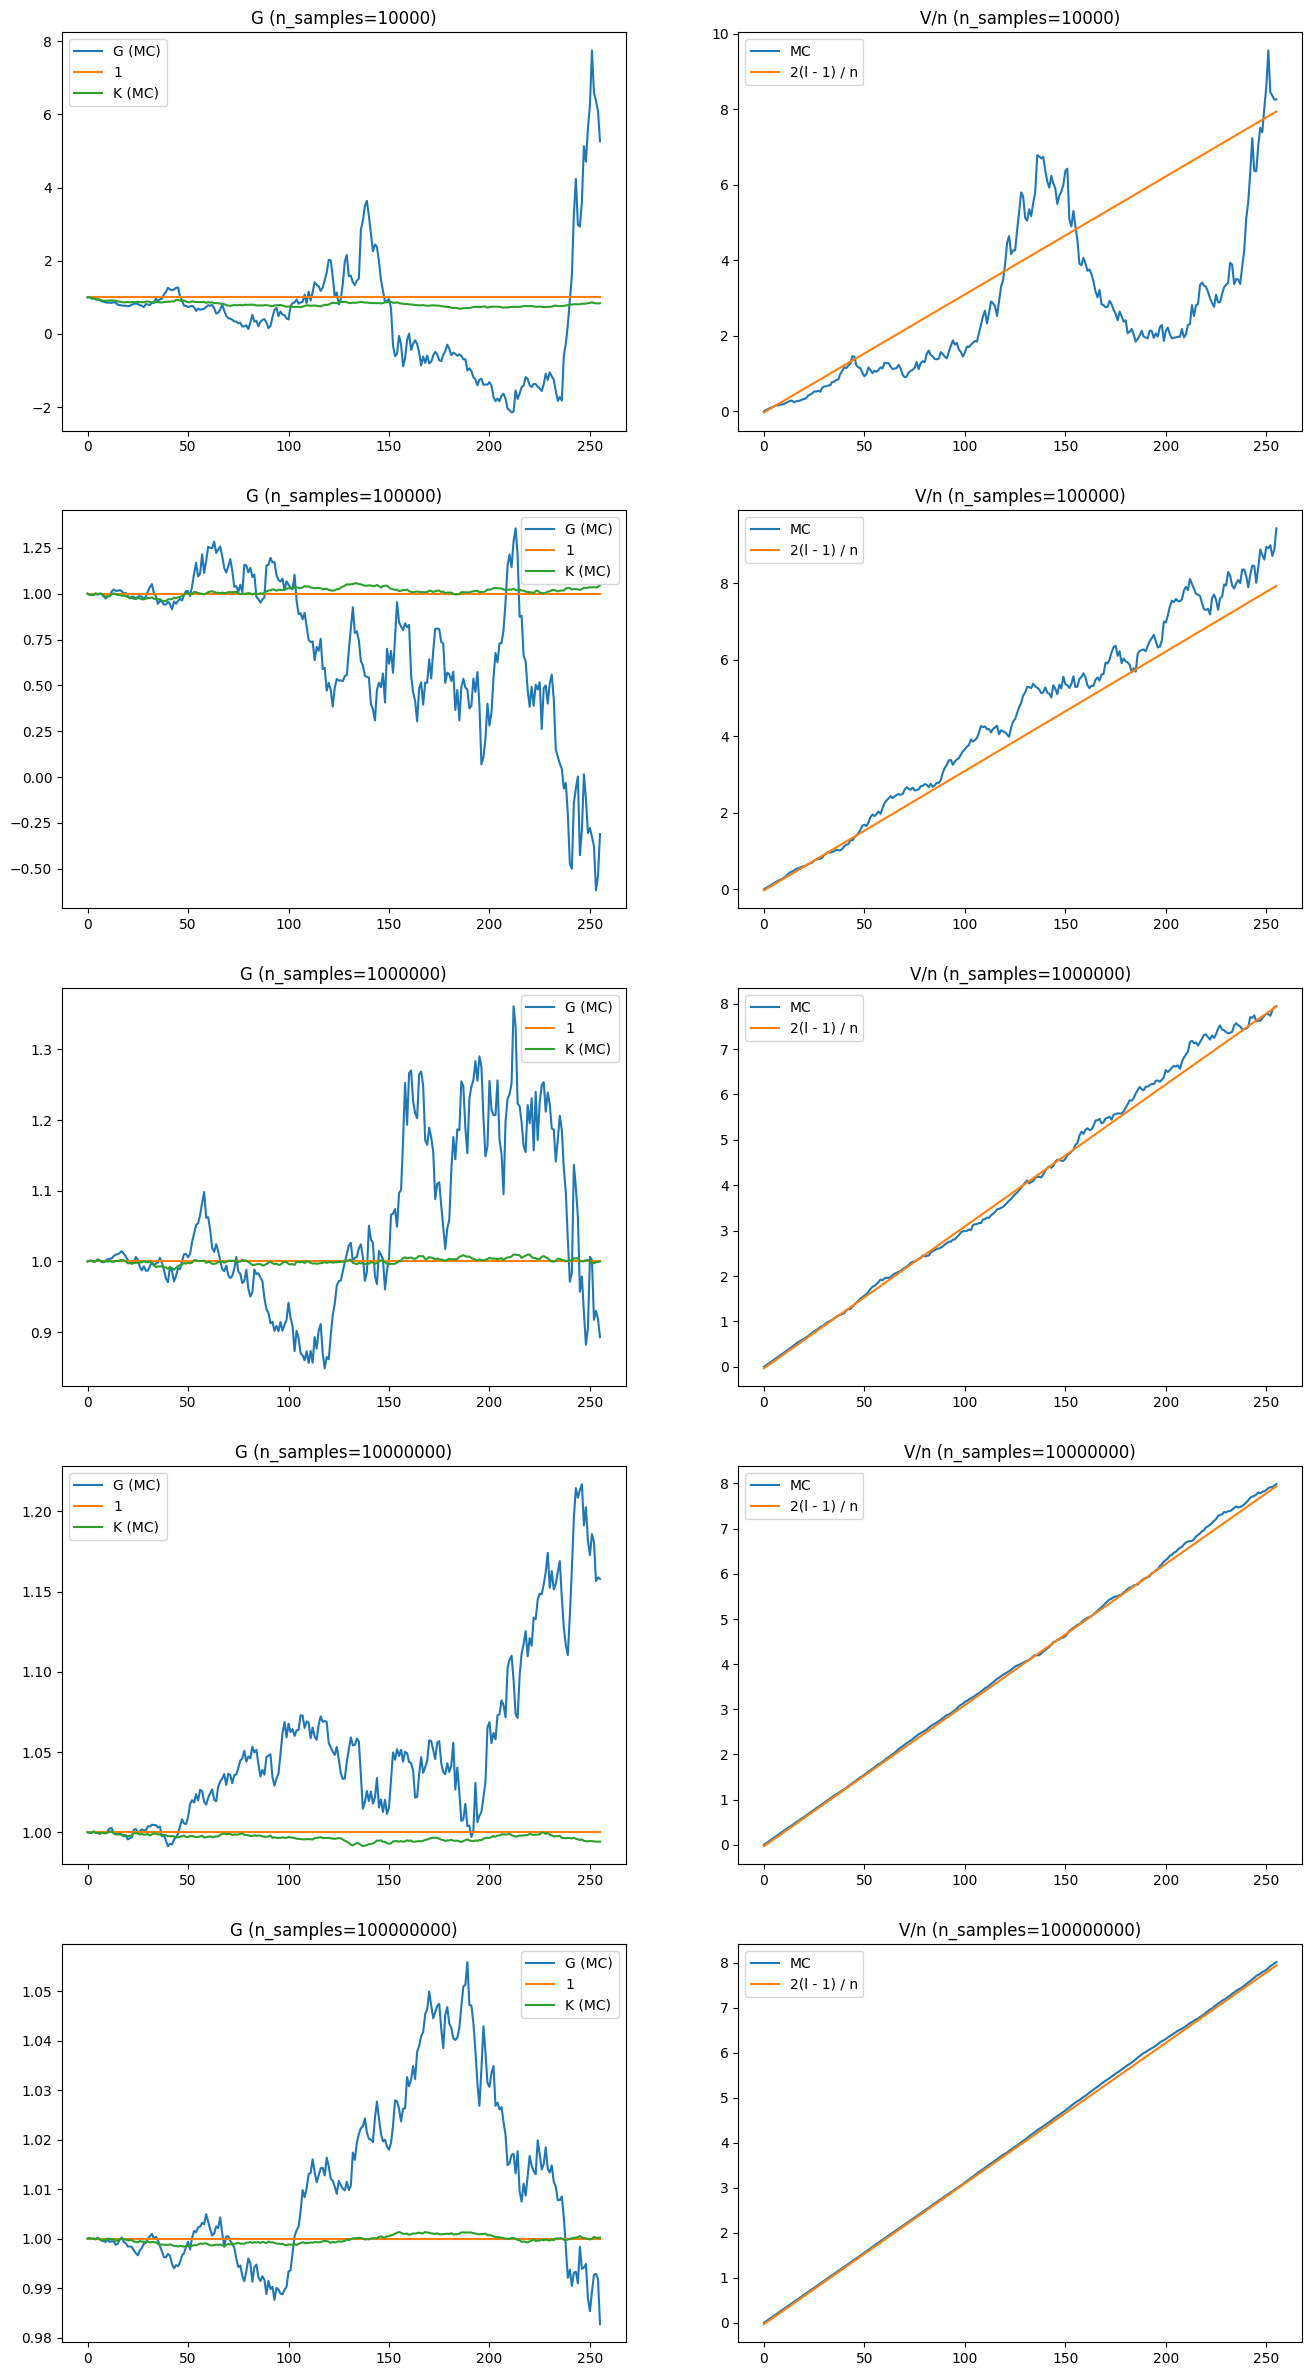

In [4]:
n_samples_list = [10000, 100000, 1000000, 10000000, 100000000]
n_batches_list = [1, 1, 1, 1, 1]
f, axs = plt.subplots(len(n_samples_list), 2, figsize=(16, 6 * len(n_samples_list)))
t = np.arange(n_layers)
for i, (n_samples, n_batches) in enumerate(zip(n_samples_list, n_batches_list)):
    K, G, V = gvc.calculate_gv(x, n_samples=n_samples, n_batches=n_batches) #, device='cuda'
    
    axs[i][0].plot(G[:, 0, 0], label="G (MC)")
    axs[i][0].plot(t, np.ones_like(t), label="1")
    axs[i][0].plot(K[:, 0, 0], label="K (MC)")
    axs[i][0].set_title(f"G (n_samples={n_samples * n_batches})")
    axs[i][0].legend()
    
    axs[i][1].plot(V[:, 0, 0, 0, 0]/n, label="MC")
    axs[i][1].plot(t, 2 * (t - 1)/n, label="2(l - 1) / n")
    axs[i][1].set_title(f"V/n (n_samples={n_samples * n_batches})")
    axs[i][1].legend();